In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from Utils_orientation import angle_cal, create_images
from Utils_plot import plot_double_result

import time
import numpy as np
import cv2
import torch

from utils.datasets import letterbox
from utils.models import *
from Utils_orientation import *

# Image path
base_file = 'figures/' + str(71) + '.jpg'
rotate_file = 'figures/' + str(99) + '.jpg'

img_orig = cv2.imread(base_file)
img_rotate = cv2.imread(rotate_file)
(h, w) = img_orig.shape[:2]
center = (w / 2, h / 2)
img_base = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)
img_rotate = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2GRAY)

bins = 360
thres = 50
# The translation angles
angle_limits = 15

angle_estimation = []

def add_gasuss_noise(image, mean=0, var=0.0001):
    ''' 
        添加高斯噪声
        mean : 均值 
        var : 方差
    '''
    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)
    return out

img_base = add_gasuss_noise(img_base)

The HoG estimation when (1.0) is  0 in 0.0429s
The HoG estimation when (2.0) is  2 in 0.0309s
The HoG estimation when (3.0) is  3 in 0.0449s
The HoG estimation when (4.0) is  3 in 0.0289s
The HoG estimation when (5.0) is  5 in 0.0309s
The HoG estimation when (6.0) is  5 in 0.0459s
The HoG estimation when (7.0) is  7 in 0.0289s
The HoG estimation when (8.0) is  7 in 0.0289s
The HoG estimation when (9.0) is  9 in 0.0449s
The HoG estimation when (10.0) is  9 in 0.0289s


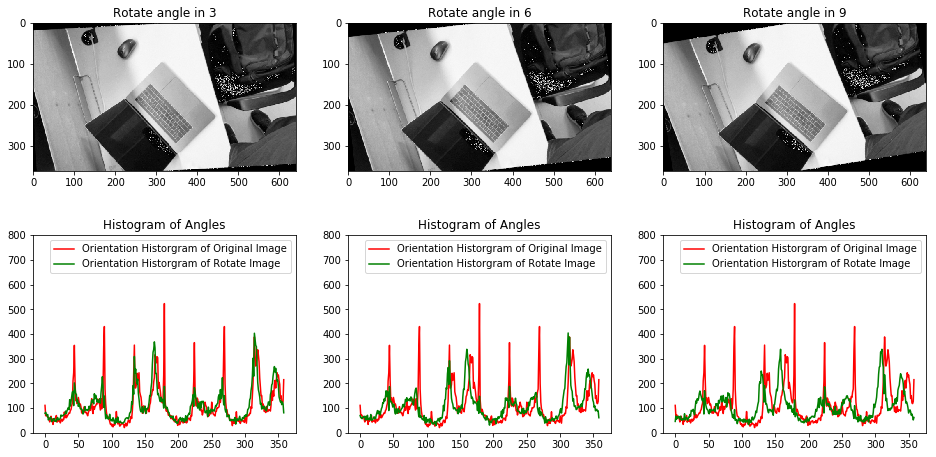

In [2]:
plt.figure(figsize=(16, 8))
for rotate_angle in range(1, 11):
    M = cv2.getRotationMatrix2D(center, rotate_angle, 1)
    img_rotate = cv2.warpAffine(img_base, M, (w, h))
    start = time.time()

    hist_base = HoG_cal(img_base, mag_thres= thres, bin_num= bins)
    hist_rotate = HoG_cal(img_rotate, mag_thres= thres, bin_num= bins)
    if rotate_angle % 3.0 == 0 and True:
        plot_index = rotate_angle / 3
        plt.subplot(2, 3, plot_index)
        plt.imshow(img_rotate, cmap= 'Greys_r')
        plt.title("Rotate angle in " + str(rotate_angle))
        plt.subplot(2, 3, plot_index + 3) 
        plt.plot(hist_base, 'r', label = 'Orientation Historgram of Original Image')
        plt.plot(hist_rotate, 'g', label = 'Orientation Historgram of Rotate Image')
        plt.legend()
        plt.ylim((0, 800))
        plt.title("Histogram of Angles")
    # Using HoG to calculate the angel
    angle = angle_HoG(hist_base, hist_rotate, limits = angle_limits)
    print("The HoG estimation when ({0:.1f}) is {1:2d} in {2:.4f}s" \
        .format(rotate_angle ,angle, time.time() - start))